In [16]:
import matplotlib.pyplot as plt
import pandas as pd

csv_file = '/Users/joshduffield/Documents/StAndrews/Isca/benchmarking/task_times.csv'

df = pd.read_csv(csv_file)
df_hs = df[df['Job Name']=='held_suarez_test_case']
df_f = df[df['Job Name']=='frierson_test_case']

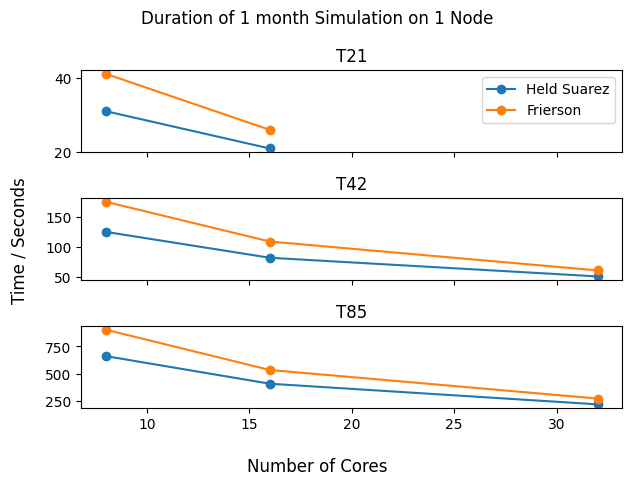

In [61]:
# Plot time vs nodes for each resolution and experiment
fig, ax = plt.subplots(3, 1, sharex=True)
res = ['T21', 'T42', 'T85']
exp = ['Held Suarez', 'Frierson']
for i in range(3):
    j = 0
    ax[i].set_title(res[i])
    for df_exp in [df_hs, df_f]:
        x = df_exp['Tasks Per Node'][df_exp['Resolution']==res[i]].to_numpy()
        y = df_exp['Time/Seconds'][df_exp['Resolution']==res[i]].to_numpy()
        if res[i] == 'T21':
            # Get rid of T21/ 32 tasks per node combination
            y = y[x!=32]
            x = x[x!=32]
        ax[i].plot(x, y, 'o-', label=exp[j])
        j+= 1
ax[0].legend()
fig.supylabel('Time / Seconds')
fig.supxlabel('Number of Cores')
plt.suptitle('Duration of 1 month Simulation on 1 Node')
fig.tight_layout()